In [1]:
# California Housing Price Prediction 

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn import model_selection
from sklearn import metrics

dataset = datasets.fetch_california_housing()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df['target'] = dataset.target

x_data = dataset.data 
y_data = dataset.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C666A3588>,
      dtype=object)

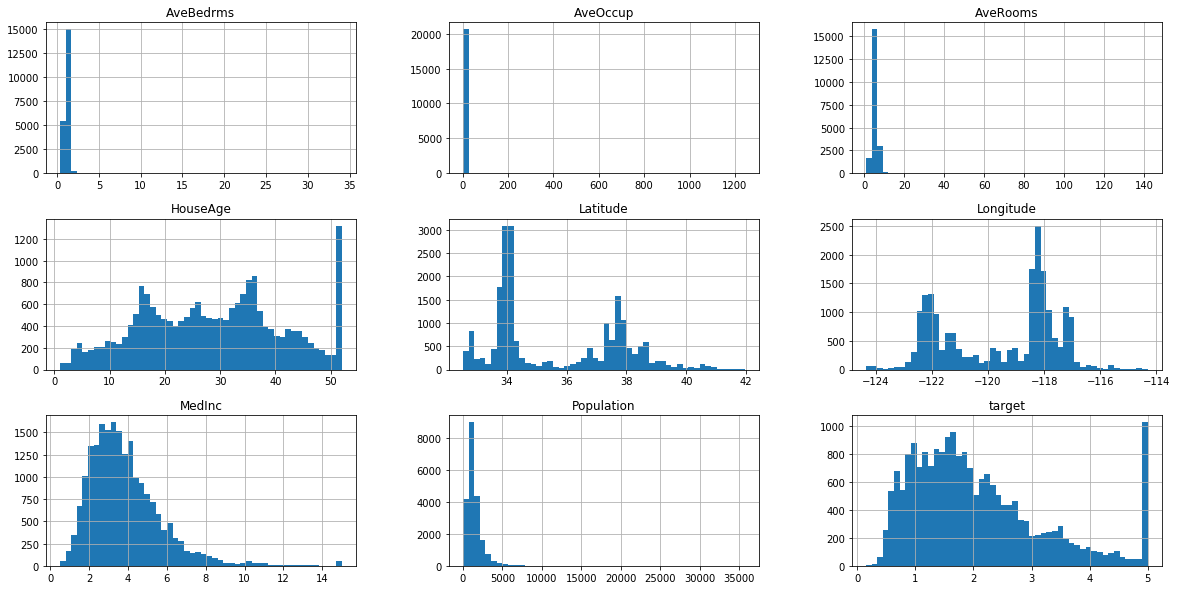

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

df.hist(bins= 50, figsize = (20,10))

In [4]:
# Target 값 (median house value for California District)가 가격인데도 불구하고 수치화 되어 있다는 것을 알 수 있다.
# 또한 그래프 안에서 5위로 넘어가지 않는 모습을 볼 때 5이상의 수치들은다 5로 category화 했다는 것을 알 수 있다.
# 8개의 특성이 있고, AveBedrms, AveOccup, AveRooms는 대부분 비슷한 분포 안에 머물러 있기 때문에 따로 봐야할 필요성이 있다.

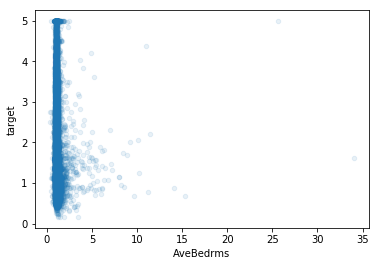

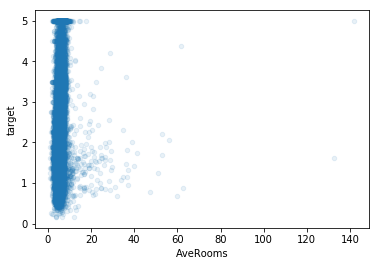

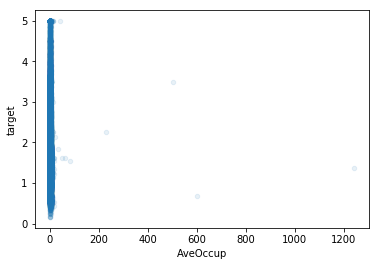

In [5]:
df.plot(kind = 'scatter', x ='AveBedrms', y = 'target', alpha = 0.1)
df.plot(kind = 'scatter', x ='AveRooms', y = 'target', alpha = 0.1)
df.plot(kind = 'scatter', x ='AveOccup', y = 'target', alpha = 0.1)

# 그래프를 봤을 때 3개의 요소와 target값의 상관관계는 크게 없어 보인다. 
#방의 개수가 많을 때도 타겟 값이 낮게 유지될 때가 있는 것이 보임.

In [6]:
corr_matrix = df.corr()

corr_matrix['target'].sort_values(ascending = False)

#상관관계를 분석해봤을 때 MedInc (Median Income in Block)이 가장 높은 상관관계 0.68을 가지고 있다는 걸을 알 수 있다. 
# 이 한 가지 요소 만으로 68%의 주택 가격을 설명할 수 있기 때문에 다른 부가적인 요소보다 훨씬 중요하다 볼 수 있다. 

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

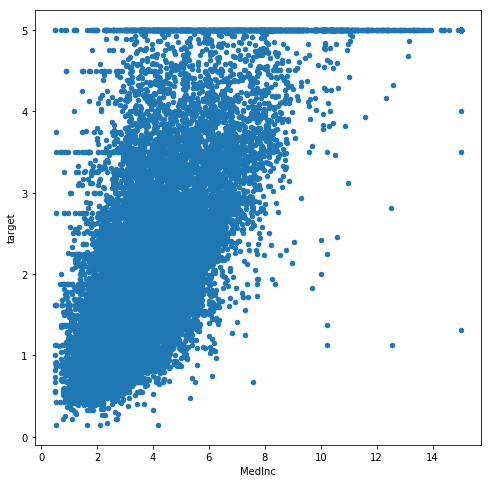

In [7]:
df.plot(kind = 'scatter', x= 'MedInc', y = 'target', figsize = (8,8))

In [8]:
# scatter로 MedInc와 Target값을 분석 해 보았을 때, 아까 봤듯이 5에 이상구간이 존재한다.
# 하지만 5 뿐만 아니라 3.5 그리고 2.8 정도 되는 부분에도 1자로 된 선이 존재하는 것을 볼 수 있다.
# 어떻게 이런 현상이 만들어졌느지는 알 수 없다..

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [10]:
# unique, counts = np.unique(y_train, return_counts = True)
# dict(zip(unique, counts))

In [11]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])


In [73]:
x_train_tr = num_pipeline.fit_transform(x_train)

In [74]:
x_test_tr = num_pipeline.fit_transform(x_test)

In [75]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(x_train_tr)

lin_mse = mean_squared_error(y_train, y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # 0.7196757085831575

0.7196757085831575

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_tr, y_train)

y_predict = tree_reg.predict(x_train)

tree_mse = mean_squared_error(y_train, y_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #.5151591497380785

1.5149920317668322

In [32]:
# Target 값이 1~5 까지 설정되어 있을 때 1.67이라는 예측오차는 33%의 예측오차를 가진다. 납득할만 한 수준의 오차이지만 
# 더 성능을 강화시켜야할 필요성이 있다 

In [33]:
# 다른 모델을 사용하기 보다는 DecisionTreeRegressor에 교차 검증을 사용하는 것이 더 나을 것 이라 판단되어 교차 검증을 시행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
# scikit learn의 교차검증 기능은 scoring 매개변수에 비용함수가 아니라 효용함수(-값)을 기대하기 때문에 제곱근 이전에 -를 취하였다.

In [34]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print("Std:", scores.std())
    
display_scores(tree_rmse_scores)


#Scores: [0.71350806 0.75451924 0.7018793  0.73714574 0.72043244 0.68099412
# 0.71434005 0.72743446 0.74051047 0.76156545]
#Mean: 0.7252329340535406
#Std: 0.023107448259442664

Scores: [0.71350806 0.75451924 0.7018793  0.73714574 0.72043244 0.68099412
 0.71434005 0.72743446 0.74051047 0.76156545]
Mean: 0.7252329340535406
Std: 0.023107448259442664


In [78]:
# Decision Tree에서 0.72라는 괜찮은 값을 얻긴 했지만 더 다양한 시도를 위해 Ensemble 방법 중 하나인 Decison Tree와 
# 비슷한RandomForestRegressor를 한 번 더 사용 

from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor(n_estimators=10, random_state = 42)
forest_reg.fit(x_train_tr, y_train)

y_predict = forest_reg.predict(x_train_tr)

forest_mse = mean_squared_error(y_train, y_predict)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # 0.22350991169997145

# 0.22라는 예측 오차는 1~5 사이이의 target 값의 범위를 고려했을 때 정말 작은 숫자지만, 너무 작은 숫자 이기에 과대적합이 아닐까 생각..

0.22350991169997145

In [79]:
# 그래도 Decison Tree와의 비교를 위해 croess validation을 통해 성능 측정을 한 번 더 해본다.
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_train_tr, y_train,
                        scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(forest_scores):
    print('Scores:', forest_scores)
    print('Mean:', forest_scores.mean())
    print("Std:", forest_scores.std())
    
display_scores(forest_rmse_scores)
    
# Scores: [0.50916816 0.56526715 0.53432037 0.55069427 0.56259291 0.52392049
# 0.50876941 0.53313909 0.53400125 0.54252215]
# Mean: 0.5364395251333102
# Std: 0.0185543661550475

#훈련세트의 점수가 검증세트의 점수보다 훨씬 낮기 때문에 과대적합 되어 있다고 볼 수 있다. 

Scores: [0.50916816 0.56526715 0.53432037 0.55069427 0.56259291 0.52392049
 0.50876941 0.53313909 0.53400125 0.54252215]
Mean: 0.5364395251333102
Std: 0.0185543661550475


In [46]:
# RandomForest가 제일 괜찮아 보이는 Model 이기 때문에 성능 향상을 위해 Grid Search 를 사용한다

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]},
  ]

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(x_train_tr, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [5, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [82]:
grid_search.best_params_
#{'max_features': 2, 'n_estimators': 30} 에서 n_estimator 값이 설정한 최대 값이 나왔기 때문에 n_estimator 를 높여서 한 번 더 실행한다.

{'max_features': 2, 'n_estimators': 30}

In [85]:
param_grid = [
    {'n_estimators': [5, 10, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]},
  ]

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(x_train_tr, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [5, 10, 50], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [86]:
grid_search.best_params_
# {'max_features': 4, 'n_estimators': 50} 가 나온 걸 봐서 n_estimator가 올라갈 수록 성능이 좋아지겠지만, 시간이 너무 오래걸리고 
# 컴퓨터의 성능 때문에 50에서 멈추기로 하였다.

{'max_features': 4, 'n_estimators': 50}

In [87]:
# Grid Search의 각각의 점수를 봄 

grid_results = grid_search.cv_results_

for mean_score, params in zip( grid_results['mean_test_score'], grid_results['params']):
    print(np.sqrt(-mean_score), params)
    
#0.5742490939248199 {'max_features': 2, 'n_estimators': 5}
#0.5333749040284189 {'max_features': 2, 'n_estimators': 10}
#0.5067303384276068 {'max_features': 2, 'n_estimators': 50}
##0.5688048560593244 {'max_features': 4, 'n_estimators': 5}
#0.5340926259877697 {'max_features': 4, 'n_estimators': 10}
#0.5032641570357043 {'max_features': 4, 'n_estimators': 50} - Best Params 
#0.5578428360257162 {'max_features': 6, 'n_estimators': 5}
#0.5318109937786818 {'max_features': 6, 'n_estimators': 10}
#0.5089837641278554 {'max_features': 6, 'n_estimators': 50}
#0.5664247568083881 {'max_features': 8, 'n_estimators': 5}
#0.5367031062434381 {'max_features': 8, 'n_estimators': 10}
#0.5137491230816458 {'max_features': 8, 'n_estimators': 50}
#0.5947529180814679 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
#0.520524928922871 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
#0.5830582966019675 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
#0.516930899972162 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
#0.5918802672163623 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
#0.52649625048487 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}

0.5742490939248199 {'max_features': 2, 'n_estimators': 5}
0.5333749040284189 {'max_features': 2, 'n_estimators': 10}
0.5067303384276068 {'max_features': 2, 'n_estimators': 50}
0.5688048560593244 {'max_features': 4, 'n_estimators': 5}
0.5340926259877697 {'max_features': 4, 'n_estimators': 10}
0.5032641570357043 {'max_features': 4, 'n_estimators': 50}
0.5578428360257162 {'max_features': 6, 'n_estimators': 5}
0.5318109937786818 {'max_features': 6, 'n_estimators': 10}
0.5089837641278554 {'max_features': 6, 'n_estimators': 50}
0.5664247568083881 {'max_features': 8, 'n_estimators': 5}
0.5367031062434381 {'max_features': 8, 'n_estimators': 10}
0.5137491230816458 {'max_features': 8, 'n_estimators': 50}
0.5947529180814679 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.520524928922871 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5830582966019675 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.516930899972162 {'bootstrap': False, 'max_features': 3, 'n_e

In [107]:
final_model = grid_search.best_estimator_

final_prediction = final_model.predict(x_test_tr)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse #0.7393221596879889 

#1부터 5까지 연속적인 target 값을 에측함에 있어 0.50 예측오차를 가진 모델을 만들었고 마지막 test set에서 0.73 예측오차를 얻었다.
# 14.6%의 오차를 가진 모델은 썩 나쁘지는 않지만 좋지도 않은 모델 같다. 
# 햇갈렸던 점 : 
# 1. StratifiedShuffleSplit을 쓰고 싶었지만 정말 안된다.
# 2. 표준화나 정규화를 할 때 target값도 정규화, 표준화가 필요한지, 그리고 정규화와 표준화 중 어떤 상황에서 뭘 써야하는지 
# 3. RandomForest에서 Classificaiton 에서는 변수 중요도를 표시할 수 있는데 Regressor 에서는 그런 코드가 없어 아쉽다
# 구현을 하기에는 코드 짜는 실력이 부족하다는 것이 눈에 보임. 

0.7393221596879889